# Importing Libraries

In [9]:
import os
import cv2
from tqdm import tqdm 
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
#from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import RMSprop
import os
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

# Loading bone supression model

In [10]:
from tensorflow import keras
model = keras.models.load_model('/Users/utkarsh/majorProject/finalModels/256AutoencoderFinal.h5')
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0     

# Converting Dataset

In [11]:
#setting paths for conversion 
normal_path = '/Users/utkarsh/majorProject/TB_Chest_Radiography_Database/Normal'
tuberculosis_path = '/Users/utkarsh/majorProject/TB_Chest_Radiography_Database/Tuberculosis'

In [12]:
img_rows = 256
img_cols = 256
img_channels = 1
img_shape = (img_rows, img_cols, img_channels)

# Creating image tensor list

In [13]:
Tuberculosis_img = []
Normal_img = []
for i in os.listdir(tuberculosis_path):
    image_path = os.path.join(tuberculosis_path,i)
    test1 = []
    test = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    test = cv2.resize(test,(img_rows,img_cols))
    test = np.array(test)/255
    test1.append(test)   
    # plt.imshow(test1[0])   
    test2 = np.array(test1).reshape(-1, img_rows, img_cols, img_channels)
    Tuberculosis_img.append(test2)

for i in os.listdir(normal_path):
    image_path = os.path.join(normal_path,i)
    test1 = []
    test = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    test = cv2.resize(test,(img_rows,img_cols))
    test = np.array(test)/255
    test1.append(test)   
    # plt.imshow(test1[0])   
    test2 = np.array(test1).reshape(-1, img_rows, img_cols, img_channels)
    Normal_img.append(test2)

print(len(Tuberculosis_img) , len(Normal_img))
    

error: OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [14]:
pred_tuberculosis_images = []
label_tuberculosis = []
pred_normal_images = []
label_normal = []
for i in range(len(Tuberculosis_img)):
    test = Tuberculosis_img[i]
    pred_img = model.predict(test)
    pred_tuberculosis_images.append(pred_img)
    label = 'tuberculosis '
    label_tuberculosis.append(label)

for i in range(len(Normal_img)):
    test = Normal_img[i]
    pred_img = model.predict(test)
    pred_normal_images.append(pred_img)
    label = 'normal'
    label_normal.append(label)

1/1 [==============================] - 0s 42ms/step


In [15]:
tuberculosis_supressed = []
for i in range(len(pred_tuberculosis_images)):
    tuberculosis_supressed.append(pred_tuberculosis_images[i][0])

In [16]:
normal_supressed = [] 
for i in range(len(pred_normal_images)):
    normal_supressed.append(pred_normal_images[i][0])

In [17]:
print(len(normal_supressed) , len(tuberculosis_supressed))
print(len(label_normal) , len(label_tuberculosis))

3500 700
3500 700


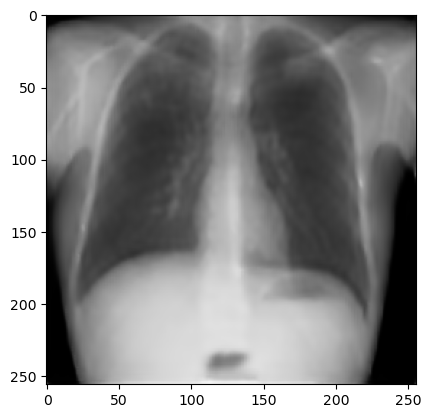

In [18]:
x = tuberculosis_supressed[150]
x = cv2.cvtColor(x,cv2.COLOR_GRAY2RGB)
plt.imshow(x,  cmap='gray')

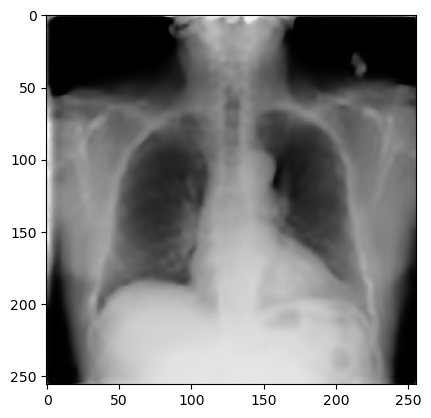

In [27]:
x = normal_supressed[190]
x = cv2.cvtColor(x,cv2.COLOR_GRAY2RGB)
plt.imshow(x,  cmap='gray')

In [30]:
tuberculosis_supressed_final =[]
for i in tuberculosis_supressed:
    img = cv2.cvtColor(i,cv2.COLOR_GRAY2RGB)
    tuberculosis_supressed_final.append(img)


In [31]:
normal_supressed_final =[]
for i in normal_supressed:
    img = cv2.cvtColor(i,cv2.COLOR_GRAY2RGB)
    normal_supressed_final.append(img)

In [32]:
print(tuberculosis_supressed_final[0].shape , normal_supressed_final[0].shape)
print(len(tuberculosis_supressed_final) , len(normal_supressed_final))
print(len(label_tuberculosis) ,len(label_normal))

(256, 256, 3) (256, 256, 3)
700 3500
700 3500


# Converting Suppressed images to text file

In [37]:
for i,file in enumerate(tuberculosis_supressed_final):
    arr_reshaped = file.reshape(x.shape[0], -1)
    np.savetxt("/Users/utkarsh/majorProject/TB/tuberculosis/" + str(i) + ".txt", arr_reshaped)


In [46]:
print(x.shape[2], x.shape[2])

3 3


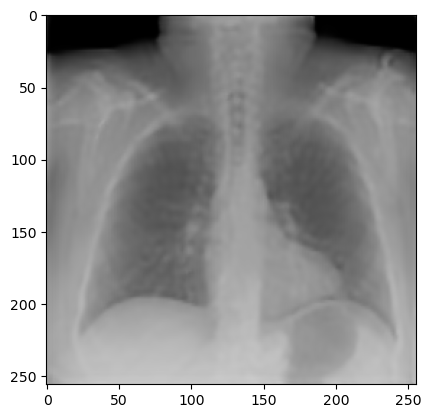

In [25]:
loaded_arr = np.loadtxt("/Users/utkarsh/majorProject/TB_textFiles/normal/124.txt")
load_original_arr = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] //3, 3)
plt.imshow(load_original_arr,  cmap='gray')

In [44]:
for i,file in enumerate(normal_supressed_final):
    arr_reshaped = file.reshape(x.shape[0], -1)
    np.savetxt("/Users/utkarsh/majorProject/TB/normal/" + str(i) + ".txt", arr_reshaped)
